<a href="https://colab.research.google.com/github/rerebebeccacca/20210602-machine-learing/blob/main/cifar10_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()


In [18]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [19]:
names = [
          "airplane",									
          "automobile",							
          "bird",				
          "cat",								
          "deer",									
          "dog",									
          "frog",										
          "horse",										
          "ship",									
          "truck"
]

7


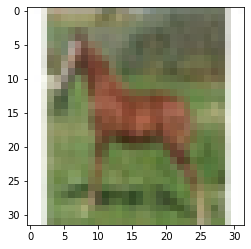

In [20]:
#上次mlp.ipynb的內容是： mnist數據集裡y_train：(60000, )[5,2,1,0]
'''
minist y_train 的shape是（60000，），cifar的y_train shape 是（50000，1）
mnist (60000, ) ---> [5, 2, 1, 0, ......]
cifao10 (50000, 1) ---> [[5], [2], [1], [0], ......]
'''
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
print(y_train[idx][0])
plt.imshow(x_train[idx])



In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D #Convolution 2D
from tensorflow.keras.layers import Dense, Flatten,Dropout#flatten平坦化（也就是攤開來3個數字相乘起來）
layers = [
          # 3 * 3 * 3(一個) ＊64 + 64(bias)=1792
          Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
          MaxPooling2D(),
          # 3 * 3 * 64(一個) ＊128 + 128(bias)=73856
          Conv2D(128, 3, activation="relu", padding="same",),
          MaxPooling2D(),
          Conv2D(256, 3, activation="relu", padding="same",),
          GlobalAveragePooling2D(),
          Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d_2 ( (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [22]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy#可節省ram的使用
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])
'''
onehot做完
3 -> [0,0,0,1,0,0,0,0....]
而一般的categoricalcrossentropy做onehot會把整個列表存起來，但是中間不要的累贅0太多
但是用sparsecategoricalcrossentropy 就只會存取那個1的檔案
'''

'\nonehot做完\n3 -> [0,0,0,1,0,0,0,0....]\n而一般的categoricalcrossentropy做onehot會把整個列表存起來，但是中間不要的累贅0太多\n但是用sparsecategoricalcrossentropy 就只會存取那個1的檔案\n'

In [23]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 4s - loss: 1.8790 - accuracy: 0.2982 - val_loss: 1.6474 - val_accuracy: 0.3814
Epoch 2/100
225/225 - 3s - loss: 1.5982 - accuracy: 0.4165 - val_loss: 1.5326 - val_accuracy: 0.4396
Epoch 3/100
225/225 - 3s - loss: 1.4609 - accuracy: 0.4720 - val_loss: 1.4217 - val_accuracy: 0.4814
Epoch 4/100
225/225 - 3s - loss: 1.3584 - accuracy: 0.5095 - val_loss: 1.3569 - val_accuracy: 0.5090
Epoch 5/100
225/225 - 3s - loss: 1.2898 - accuracy: 0.5392 - val_loss: 1.2702 - val_accuracy: 0.5454
Epoch 6/100
225/225 - 3s - loss: 1.2406 - accuracy: 0.5577 - val_loss: 1.2916 - val_accuracy: 0.5452
Epoch 7/100
225/225 - 3s - loss: 1.1992 - accuracy: 0.5749 - val_loss: 1.2094 - val_accuracy: 0.5602
Epoch 8/100
225/225 - 3s - loss: 1.1539 - accuracy: 0.5918 - val_loss: 1.1525 - val_accuracy: 0.5866
Epoch 9/100
225/225 - 3s - loss: 1.1181 - accuracy: 0.6047 - val_loss: 1.1437 - val_accuracy: 0.5976
Epoch 10/100
225/225 - 3s - loss: 1.0806 - accuracy: 0.6171 - val_loss: 1.0654 - val_accura

In [25]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7031 - accuracy: 0.7569


[0.7031163573265076, 0.7569000124931335]

In [26]:
pre = model.predict_classes(x_test_norm)
print(y_test.shape)#二維
print(pre.shape)#一維
# -1:叫他幫你算10000*1 = -1(?)，所以重新shape他
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(10000, 1)
(10000,)
(10000,)


In [27]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就帶one-hot y_test_cat
# 不在: 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),839,24,28,9,16,4,8,12,43,17
automobile(正確),22,866,1,7,4,2,3,6,18,71
bird(正確),92,4,595,45,100,56,71,25,2,10
cat(正確),28,8,56,533,48,191,82,29,12,13
deer(正確),22,3,39,36,747,33,51,60,8,1
dog(正確),17,5,30,143,40,698,22,39,3,3
frog(正確),13,3,32,46,44,26,828,1,7,0
horse(正確),24,1,36,24,55,61,3,787,0,9
ship(正確),79,19,7,8,10,8,4,5,837,23
truck(正確),38,66,4,9,3,5,6,15,15,839


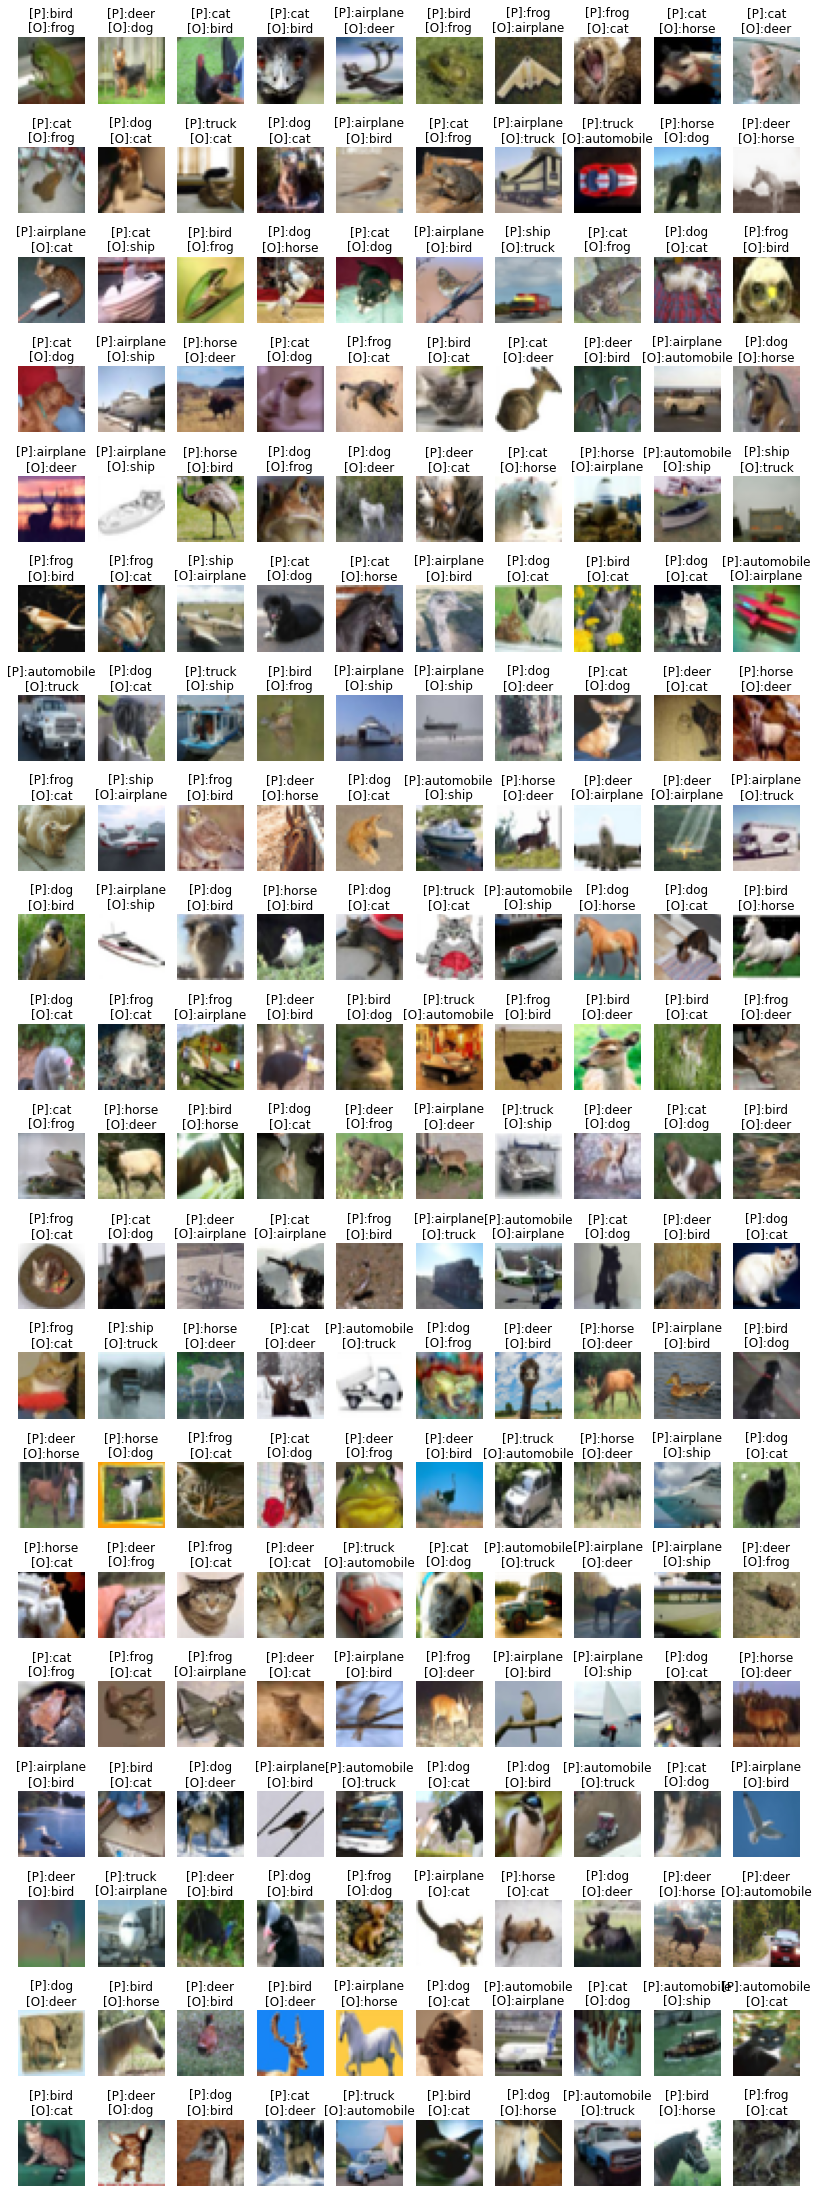

In [28]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]#抓前兩百張
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

輸入網址:https://images.chinatimes.com/newsphoto/2020-07-04/656/20200704002959.jpg
airplane 的機率: 0.004
automobile 的機率: 0.0
bird 的機率: 0.329
cat 的機率: 0.002
deer 的機率: 0.008
dog 的機率: 0.649
frog 的機率: 0.001
horse 的機率: 0.006
ship 的機率: 0.0
truck 的機率: 0.0


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


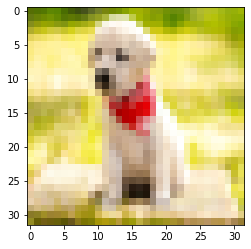

In [31]:

import requests
from PIL import Image
url = input("輸入網址:")
response = requests.get(url, verify=False, stream=True)
img = Image.open(response.raw)
img = img.resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_norm = np.array([img_np]) / 255
pre = model.predict(img_norm)[0]
for n, p in zip(names, pre):
    print(n, "的機率:", round(p, 3))
plt.imshow(img)
